# Ford GoBike System Data

**This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.**

In [2]:
# import  all necessary package to work with
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os
import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as tick
%matplotlib inline

### Data Wrangling

In [3]:
#load data into df
df = pd.read_csv('fordgobike.csv')

In [4]:
#display sample number of 7 in the dataset
df.sample(7)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
28519,363,2019-02-25 08:38:20.1540,2019-02-25 08:44:23.7400,160.0,West Oakland BART Station,37.805318,-122.294837,187.0,Jack London Square,37.796248,-122.279352,4791,Customer,1987.0,Male,No
955,371,2019-02-28 20:02:52.5490,2019-02-28 20:09:03.6700,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,58.0,Market St at 10th St,37.776619,-122.417385,5253,Subscriber,1999.0,Female,No
153301,459,2019-02-06 13:02:23.8830,2019-02-06 13:10:03.2900,253.0,Haste St at College Ave,37.866418,-122.253799,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,852,Subscriber,1999.0,Male,Yes
47771,506,2019-02-22 08:29:55.0890,2019-02-22 08:38:21.6180,78.0,Folsom St at 9th St,37.773717,-122.411647,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2722,Subscriber,1995.0,Female,No
58014,820,2019-02-21 07:33:45.6820,2019-02-21 07:47:26.2580,133.0,Valencia St at 22nd St,37.755213,-122.420975,104.0,4th St at 16th St,37.767045,-122.390833,6523,Subscriber,1980.0,Other,No
166306,749,2019-02-04 19:08:38.1720,2019-02-04 19:21:07.5280,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,33.0,Golden Gate Ave at Hyde St,37.781650,-122.415408,675,Subscriber,1983.0,Male,No
156204,748,2019-02-06 08:06:05.2680,2019-02-06 08:18:33.3380,167.0,College Ave at Harwood Ave,37.848152,-122.252160,212.0,Mosswood Park,37.824893,-122.260437,2871,Subscriber,1985.0,Female,No


In [5]:
#display data type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
#find null values in the data
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
# check number of rows and columns in data
df.shape

(183412, 16)

In [8]:
#find duplicated data 
df.duplicated().sum()

0

In [9]:
#Drop null values across the columns
df.dropna(axis=0, inplace=True)

#### Test

In [10]:
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [12]:
### Clean age, find inappropraite age in the birth year column

In [13]:
df.member_birth_year.describe()

count    174952.000000
mean       1984.803135
std          10.118731
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

In [14]:
# Substract current year and maximum year in df
datetime.date.today().year - df.member_birth_year.max() 

21.0

In [15]:
# Substract current year and minimum year in df
datetime.date.today().year - df.member_birth_year.min()

144.0

In [16]:
# drop people more than 100 years old
print(datetime.date.today().year - 100)
df = df.drop(df[df.member_birth_year < 1922].index )

1922


#### Test

In [17]:
datetime.date.today().year - df.member_birth_year.min()

95.0

In [18]:
#Change start_time and end_time to datetime field in df
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [19]:
# create a column of age and set dtype to interger
df['age'] = datetime.date.today().year - df.member_birth_year  
df['age'] = df['age'].astype(int)

In [20]:
# create a column of duration in minutes 
df['duration_min'] = df.duration_sec // 60

In [21]:
# create a column of hour & day 
df=df.assign(hour=pd.to_datetime(df['start_time']).dt.strftime("%H"), day=pd.to_datetime(df['start_time']).dt.date)
df['hour'] = df['hour'].astype(int)

In [22]:
# create a column of day name 
df['day_of_week'] = df['start_time'].dt.day_name()

In [23]:
### check if day is weekday or weekend 

In [24]:
weekday = ( 'Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' )
weekend = ( 'Saturday' , 'Sunday' )

def type_day(day) :
    
    if day in weekday :
        type_of_day = 'weekday'
    
    else :
        type_of_day = 'weekend'
        
    return type_of_day

In [25]:
#apply function into type of day
df['type_of_day'] = df['day_of_week'].apply(type_day) 

In [26]:
# Drop axis of columns 
df.drop(['start_station_latitude', 'start_station_longitude' ,
         'end_station_latitude' , 'end_station_longitude' ,
         'member_birth_year' , 'bike_id' , 'duration_sec'] , axis = 1 ,inplace = True) 

In [27]:
#Test

In [28]:
df.head()

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_gender,bike_share_for_all_trip,age,duration_min,hour,day,day_of_week,type_of_day
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,Customer,Male,No,38,869,17,2019-02-28,Thursday,weekday
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),Customer,Male,No,50,1030,12,2019-02-28,Thursday,weekday
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,Subscriber,Other,No,33,608,17,2019-02-28,Thursday,weekday
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,Subscriber,Male,Yes,48,26,23,2019-02-28,Thursday,weekday
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,Subscriber,Male,No,63,29,23,2019-02-28,Thursday,weekday


In [29]:
# save data after cleaning to csv file 
df1 = df.copy()
df1.to_csv('fordgobike-clean.csv')

# Exploratory Data Analysis


**Univariate Exploration**

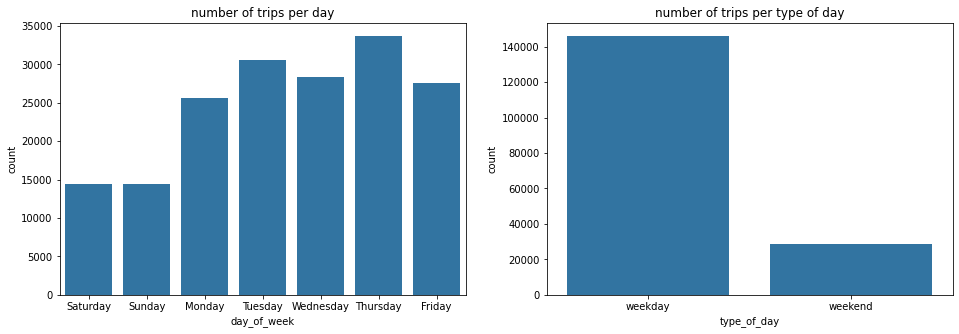

In [30]:
# frequency of trips across the week
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]     # to make chart one color 
days = (  'Saturday' , 'Sunday' , 'Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' )
    
    
plt.subplot(1, 2, 1)
sb.countplot(data= df , x='day_of_week' , color=base_color , order = days)
plt.title('number of trips per day')


plt.subplot(1, 2, 2)
sb.countplot(data= df1 , x='type_of_day' , color=base_color)
plt.title('number of trips per type of day');
 



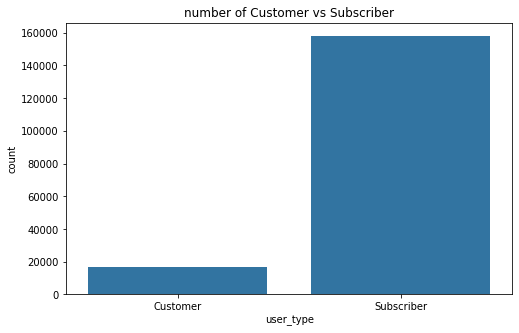

In [31]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[0]    
 
sb.countplot(data= df1 , x='user_type' , color=base_color )
plt.title('number of Customer vs Subscriber') ;

This graph shows; Number of subscribers is more than Customers

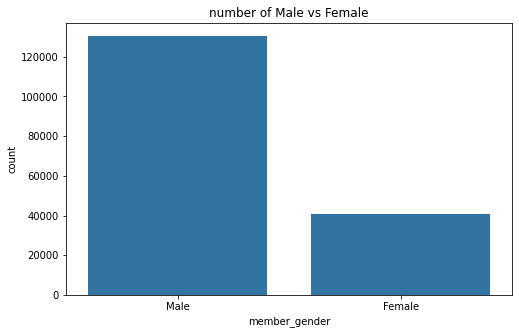

In [32]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[0]    
gender = ( 'Male' , 'Female' )

sb.countplot(data= df1 , x='member_gender' , color=base_color , order = gender )
plt.title('number of Male vs Female');

 This graph shows there are more male compared to female

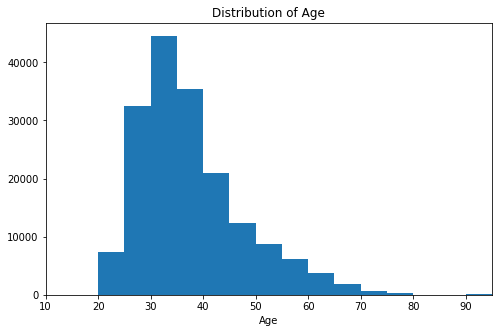

In [33]:
# distribution of age
plt.figure(figsize = [8, 5])
bins_x = np.arange(10, df['age'].max()+5, 5)

plt.hist( data= df1 , x='age', bins = bins_x  )
plt.title('Distribution of Age') 
plt.xlabel('Age')
plt.xlim((10,95)) ;

This graphs shows; The most age distributions is within 30s

###### Test

In [34]:
df1.describe()

,start_station_id,end_station_id,age,duration_min,hour
count,174877.000000,174877.000000,174877.00000,174877.000000,174877.000000
mean,138.980386,136.604127,37.16093,11.241839,13.456115
std,111.636777,111.333164,9.97047,27.376671,4.734410
min,3.000000,3.000000,21.00000,1.000000,0.000000
25%,47.000000,44.000000,30.00000,5.000000,9.000000
50%,104.000000,101.000000,35.00000,8.000000,14.000000
75%,239.000000,238.000000,42.00000,13.000000,17.000000
max,398.000000,398.000000,95.00000,1409.000000,23.000000


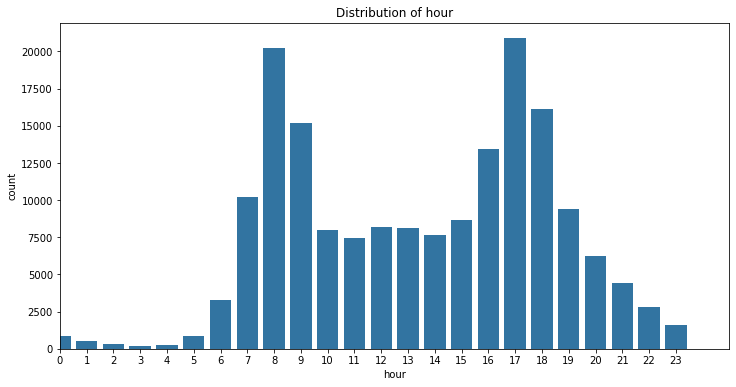

In [35]:
# distribution of hour 
plt.figure(figsize = [12, 6])
bins_x = np.arange(0, df['hour'].max()+1, 1)

sb.countplot( data= df1 , x='hour' , color=base_color )
plt.title('Distribution of hour') 
plt.xlabel('hour')
plt.xlim((0,25));

This hraph shows rush hour is between 7am to 9am and 4pm to 6pm

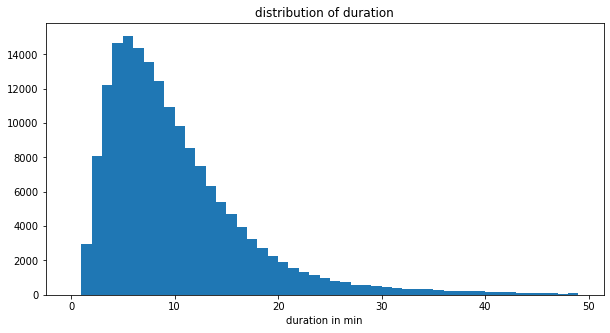

In [36]:
# distribution of duration 
plt.figure(figsize = [10, 5])
bins_x = np.arange(0,50, 1)

plt.hist( data= df1 , x='duration_min', bins = bins_x  )
plt.title('distribution of duration') 
plt.xlabel('duration in min');

This graph shows; Most rides are taken between 3min and 20min

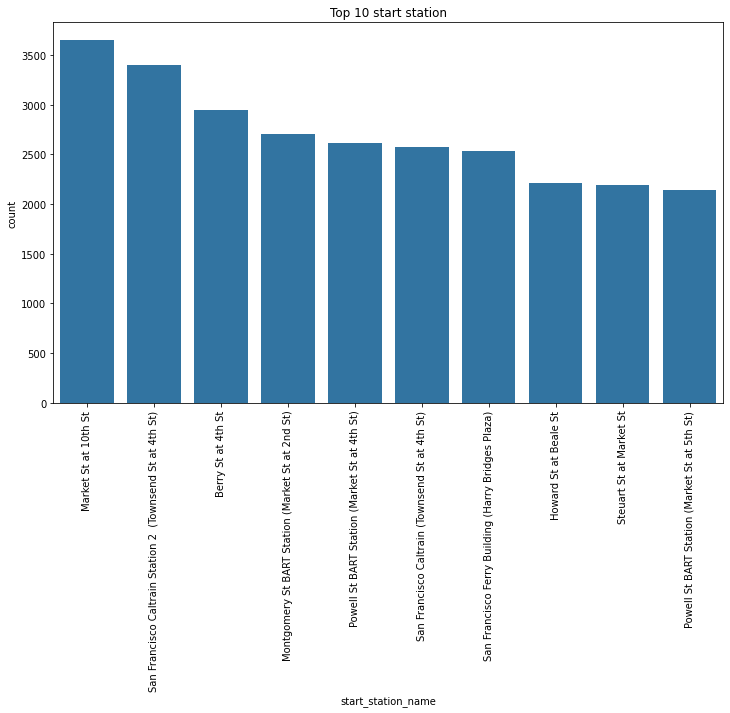

In [37]:
most_10_station = df['start_station_name'].value_counts().head(10).index

# Frequency of top start stations 
plt.figure(figsize = [12, 7])
base_color = sb.color_palette()[0]    
plt.xticks(rotation=90)

sb.countplot(data= df1 , x='start_station_name' , color=base_color , order = most_10_station )
plt.title('Top 10 start station');

## Bivariate Exploration

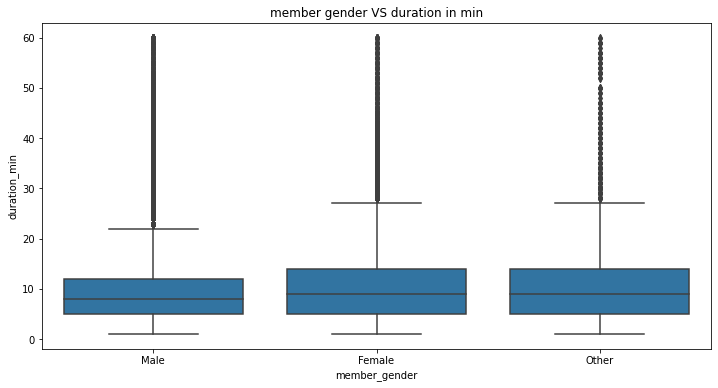

In [38]:
# distribution of duration in min. Vs. gender:
df_duration = df1.query( " duration_min <= 60") 
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
sb.boxplot(data=df_duration , x='member_gender' , y='duration_min' , color=base_color)
plt.title('member gender VS duration in min') ;

this graph shows the trip duration is almost the same for all genders

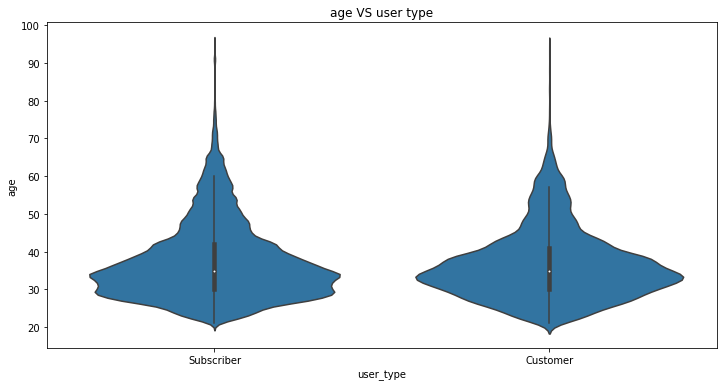

In [39]:
# distribution of age Vs gender user type
df_duration = df1.query( " duration_min <= 60") 
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
sb.violinplot(data=df_duration , x='user_type' , y='age' , color=base_color)
plt.title('age VS user type');

This plot shows there's a relationship between subscribers and customers

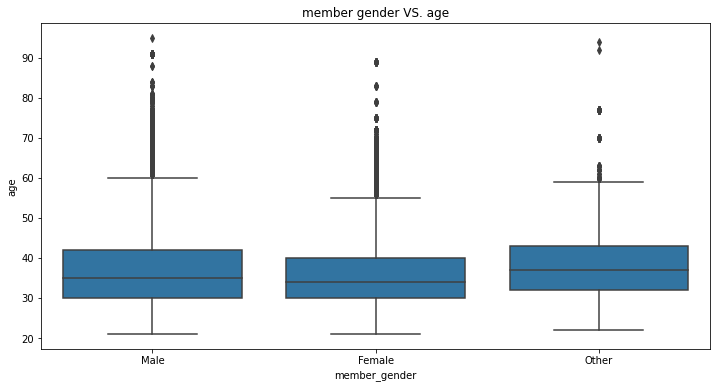

In [40]:
# distribution of age Vs. gender:
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
sb.boxplot(data=df_duration , x='member_gender' , y='age' , color=base_color)
plt.title('member gender VS. age') ;

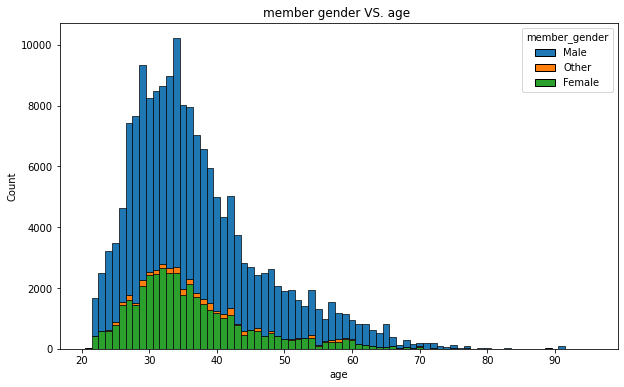

In [41]:
# distribution of age Vs. gender:
plt.figure(figsize = [10, 6])

sb.histplot(data=df1, x='age', stat='count', discrete=True, hue='member_gender', multiple='stack', alpha = 1)
plt.title('member gender VS. age ');

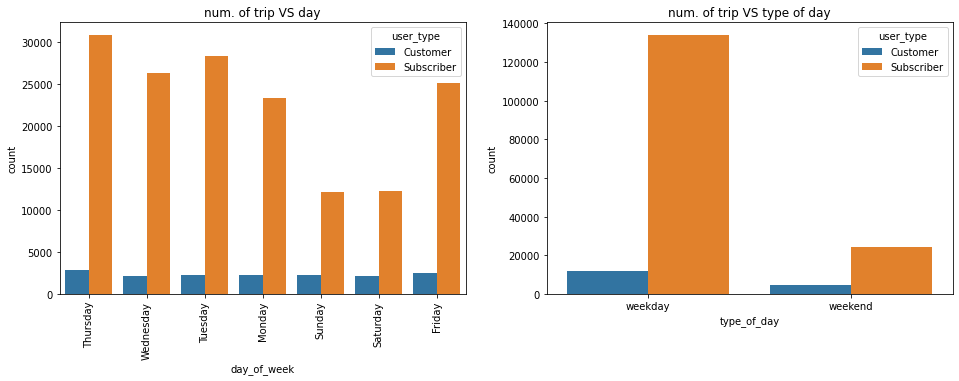

In [42]:
# Plotting numberof trip Vs weekdays Vs the type of day:

plt.figure(figsize = [16, 5])

plt.subplot(1, 2, 1)
sb.countplot(data=df1 , x='day_of_week', hue='user_type')
plt.title('num. of trip VS day') 
plt.xticks(rotation=90)
    
plt.subplot(1, 2, 2)
sb.countplot(data=df , x='type_of_day', hue='user_type')
plt.title('num. of trip VS type of day') ;

This graph shows;
Number of customer is the same across all of weekday , but slightly less in the weekend
Number of subscriber is greatly reduced in the weekend   

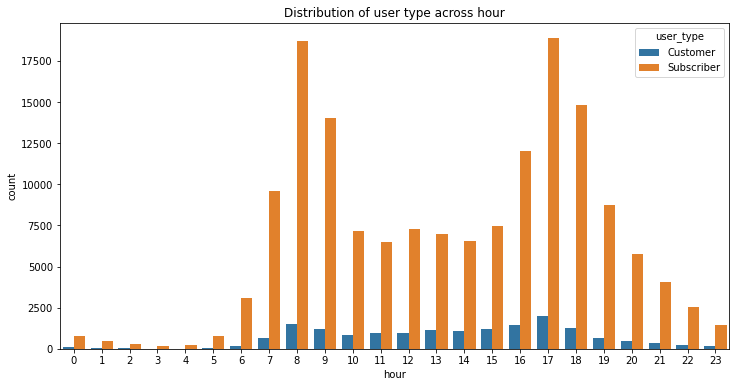

In [43]:


# distribution of hour vs user type
plt.figure(figsize = [12, 6])
 
sb.countplot( data= df1 , x='hour' , hue = 'user_type')
plt.title('Distribution of user type across hour') 
plt.xlabel('hour') ;



this graph shows; 

subscriber will likely use Bike in rush hour and
customer will use Bike in rush hour.

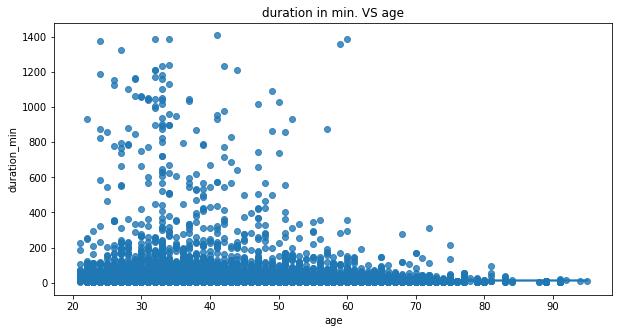

In [44]:
# plotting duration in min. VS age
plt.figure(figsize = [10,5])
sb.regplot(data = df1 , x = 'age', y = 'duration_min');
plt.title('duration in min. VS age') ;

This plot shows no relationship between duration in minute and age

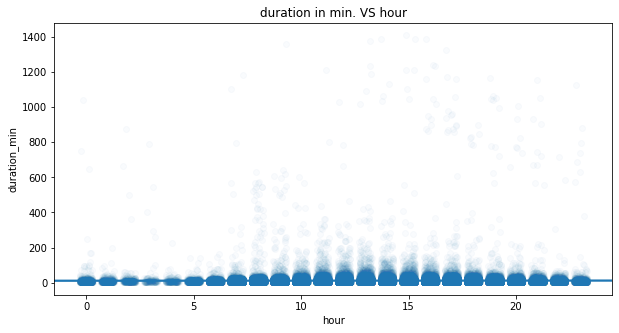

In [54]:
# plotting duration in min. VS hour
plt.figure(figsize = [10, 5])
sb.regplot(data = df1 , x = 'hour', y = 'duration_min', x_jitter=0.3, scatter_kws={'alpha':1/40}, truncate=False);
plt.title('duration in min. VS hour');

this plot shows no relationship between hour and duration in min.

## Multivariate Exploration

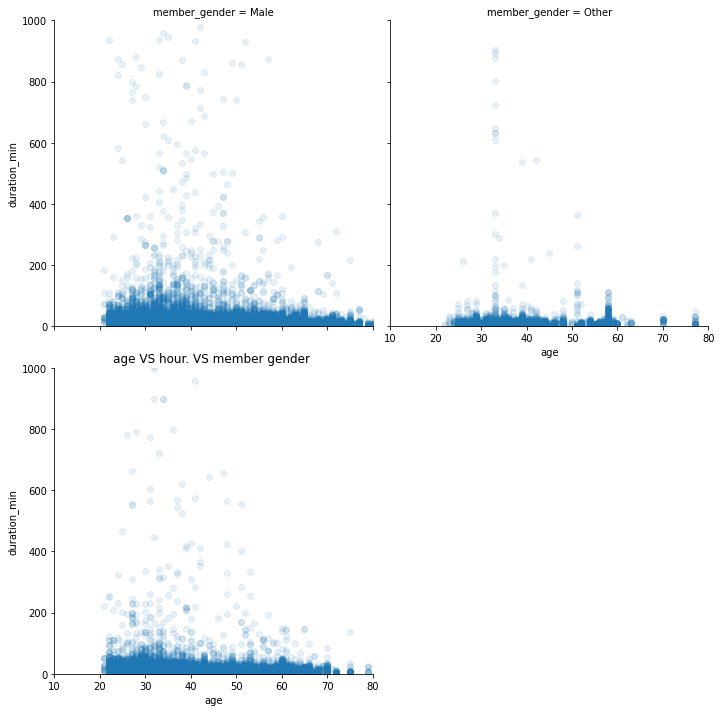

In [58]:
# age VS hour. VS member gender 
g = sb.FacetGrid(data = df1, col = 'member_gender', size = 5, col_wrap=2, xlim=[10,80], ylim=[0,1000])
g.map(plt.scatter, 'age', 'duration_min', alpha=0.1)
g.add_legend() 
plt.title('age VS hour. VS member gender ');

This graph shows; 

There is no relationship between hour , age and gender.

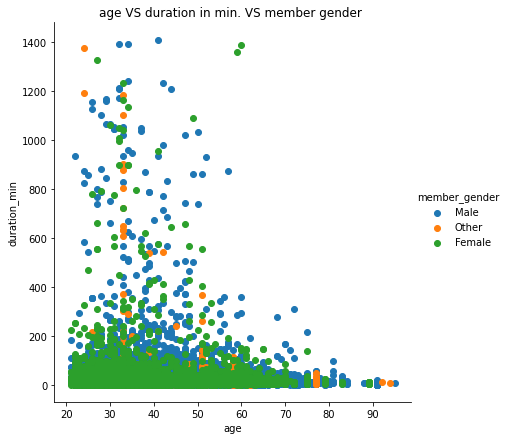

In [47]:
# age VS duration in min. VS member gender
g = sb.FacetGrid(data = df1, hue = 'member_gender', size = 6)
g.map(plt.scatter, 'age', 'duration_min')
g.add_legend() 
plt.title('age VS duration in min. VS member gender ');

this graph shows; There is no relationship between duration in min. , age and gender .

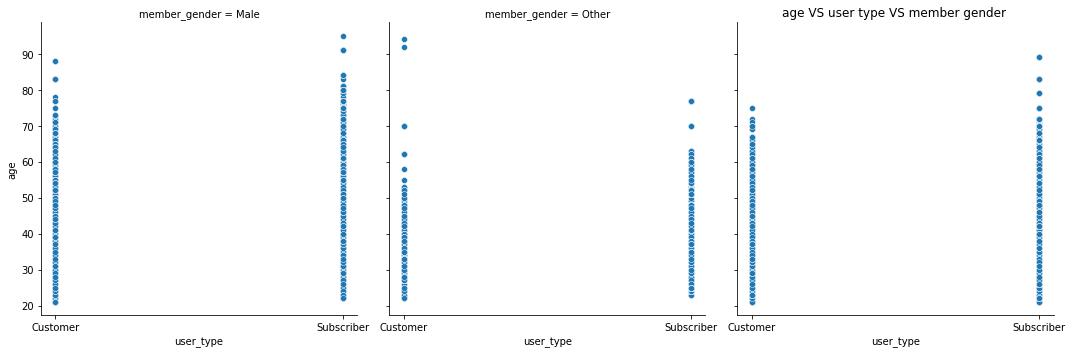

In [48]:
# age VS user type VS member gender 
g = sb.FacetGrid(data = df1, col = 'member_gender', size = 5)
g.map(sb.scatterplot, 'user_type', 'age')
plt.title('age VS user type VS member gender ');

This graph shows no relationship between gender, user_type and age

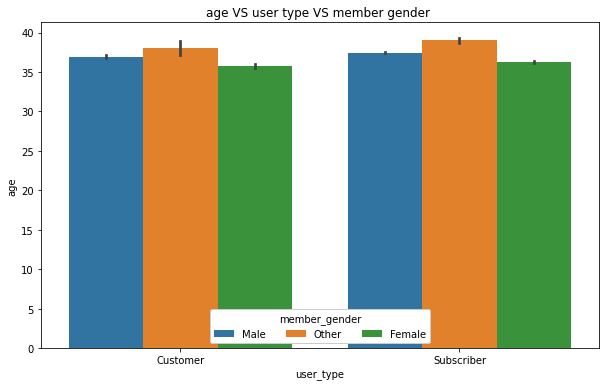

In [49]:
plt.figure(figsize = [10,6])

ax = sb.barplot(data = df1, x = 'user_type', y = 'age', hue = 'member_gender')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'member_gender')
plt.title('age VS user type VS member gender ') ;

This graph shows; distribution is nearly the same across customers and Subscribers


Findings

1 -number of trip at the weekday is about three times more than in the weekend

2-number of male much more than female.

3-number of Subscriber is about seven times more than Customer

4-Most bike rides are between 25 and 35 years old

5-the most ride take between 3 and 20 min

6-Rush hour between (7am : 9am) and (4pm : 6pm)
